# EDA: Predicting Taxi Fare Prices

### Life Cycle of a Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Validation: Performing data checks
- Exploratory Data Analysis(EDA)
- Data Pre-Processing
- Model Training
- Model Evaluation: Choosing the best model
- Model Deployment: Utlising the model

## 1) Problem Statement

- The aim of the project is to build a machine learning model that can predict taxi fare prices. 
- In the EDA section, we'll start by analysing the Yellow Taxi trip data to understand how fare price is influenced by other variables such as trip duration, trip distance, location e.t.c

## 2) Data Collection
- Data Source: We'll use the sample data extracted from the raw data since the size of the dataset is quite big. In future iterations we'll use other techniques to handle and analyse the entire dataset. 
- The sample dataset has 113,118 rows

### 2.1) Importing the Data and the Required packages

In [1]:
#importing necessary libs
import numpy as np
import pandas as pd

#data visualisation
import seaborn as sns     
sns.set_theme(palette='deep')
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.express as px

#To Display all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
#importing the csv data as a dataframe
dataset = pd.read_csv("..\..\data\Yellow_Taxi_Trip_Sample.csv")

In [4]:
#Top 5 records
dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,07/27/2017 06:04:13 PM,07/27/2017 06:42:53 PM,1,10.80,1,N,143,138,1,36.0,1.0,0.5,5.00,5.76,0.3,48.56
1,2,07/27/2017 06:30:35 PM,07/27/2017 06:52:03 PM,6,6.53,1,N,231,162,1,21.0,1.0,0.5,3.42,0.00,0.3,26.22
2,2,07/27/2017 06:01:39 PM,07/27/2017 06:24:32 PM,1,3.11,1,N,100,238,2,16.0,1.0,0.5,0.00,0.00,0.3,17.80
3,2,07/27/2017 06:31:48 PM,07/27/2017 06:43:38 PM,1,0.71,1,N,233,230,1,8.5,1.0,0.5,2.06,0.00,0.3,12.36
4,2,07/27/2017 06:10:56 PM,07/27/2017 06:19:01 PM,1,1.35,1,N,186,249,1,7.5,1.0,0.5,2.79,0.00,0.3,12.09


In [5]:
#Shape of the dataset
dataset.shape

(113118, 17)

### 2.2) Dataset Information

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113118 entries, 0 to 113117
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               113118 non-null  int64  
 1   tpep_pickup_datetime   113118 non-null  object 
 2   tpep_dropoff_datetime  113118 non-null  object 
 3   passenger_count        113118 non-null  int64  
 4   trip_distance          113118 non-null  float64
 5   RatecodeID             113118 non-null  int64  
 6   store_and_fwd_flag     113118 non-null  object 
 7   PULocationID           113118 non-null  int64  
 8   DOLocationID           113118 non-null  int64  
 9   payment_type           113118 non-null  int64  
 10  fare_amount            113118 non-null  float64
 11  extra                  113118 non-null  float64
 12  mta_tax                113118 non-null  float64
 13  tip_amount             113118 non-null  float64
 14  tolls_amount           113118 non-nu

**The following are the column descriptions:**
- VendorID: A code indicating the TPEP provider that provided the record. 
- tpep_pickup_datetime: The date and time when the meter was engaged.
- tpep_dropoff_datetime: The date and time when the meter was disengaged. 
- passenger_count: The number of passengers in the vehicle. 
- trip_distance: The elapsed trip distance in miles reported by the taximeter.
- RatecodeID: The final rate code in effect at the end of the trip.
- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
- PULocationID: TLC Taxi Zone in which the taximeter was engaged
- DOLocationID: TLC Taxi Zone in which the taximeter was disengaged
- payment_type: A numeric code signifying how the passenger paid for the trip.
- fare_amount: The time-and-distance fare calculated by the meter.
- extra: Miscellaneous extras and surcharges.
- mta_tax: Tax that is automatically triggered based on the metered rate in use.
- tip_amount: Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
- tolls_amount: Total amount of all tolls paid in trip.
- improvement_surcharge: Improvement surcharge assessed trips at the flag drop
- total_amount: The total amount charged to passengers. Does not include cash tips.

## 3) Data Checks to Perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1) Checking Missing Values

In [7]:
dataset.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

There are no missing values in the dataset

### 3.2) Checking Duplicates

In [9]:
dataset.duplicated().sum()

0

There are no duplicate records

### 3.3) Data Types

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113118 entries, 0 to 113117
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               113118 non-null  int64  
 1   tpep_pickup_datetime   113118 non-null  object 
 2   tpep_dropoff_datetime  113118 non-null  object 
 3   passenger_count        113118 non-null  int64  
 4   trip_distance          113118 non-null  float64
 5   RatecodeID             113118 non-null  int64  
 6   store_and_fwd_flag     113118 non-null  object 
 7   PULocationID           113118 non-null  int64  
 8   DOLocationID           113118 non-null  int64  
 9   payment_type           113118 non-null  int64  
 10  fare_amount            113118 non-null  float64
 11  extra                  113118 non-null  float64
 12  mta_tax                113118 non-null  float64
 13  tip_amount             113118 non-null  float64
 14  tolls_amount           113118 non-nu

### 3.4) Checking the number of unique values in each column

In [11]:
dataset.nunique()

VendorID                      2
tpep_pickup_datetime     112899
tpep_dropoff_datetime    112859
passenger_count               7
trip_distance              2283
RatecodeID                    6
store_and_fwd_flag            2
PULocationID                181
DOLocationID                251
payment_type                  4
fare_amount                 304
extra                        10
mta_tax                       4
tip_amount                 1222
tolls_amount                114
improvement_surcharge         3
total_amount               2744
dtype: int64

### 3.5) Checking the statistics of the dataset

In [12]:
dataset.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000,113118.000000
mean,1.548472,1.626098,2.939270,1.045316,162.818146,160.730308,1.337205,13.005571,0.332234,0.497172,1.838765,0.333724,0.299605,16.311433
std,0.497647,1.265469,3.753605,0.585848,66.720287,70.373741,0.493508,11.352214,0.463371,0.040872,2.567355,1.940302,0.014624,14.114762
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-52.000000,-4.500000,-0.500000,-1.140000,0.000000,-0.300000,-57.300000
25%,1.000000,1.000000,0.980000,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.500000
50%,2.000000,1.000000,1.620000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.030000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,66.500000,99.000000,265.000000,265.000000,4.000000,347.000000,4.500000,0.850000,160.000000,415.650000,0.300000,420.950000


**Insights**
- There are fare amounts that are less than 0, which need to be investigated further and removed from the analysis. 
- There are trip distances recorded to be less than 0 

### 3.6) Feature Creation
- Creating Trip Duration based on pickup and drop-off times
- Creating Day of Week, Hour, Month, and year based on the pickup and drop-off times

In [13]:
#Converting to datetime
dataset["tpep_pickup_datetime"] = pd.to_datetime(dataset["tpep_pickup_datetime"])
dataset["tpep_dropoff_datetime"] = pd.to_datetime(dataset["tpep_dropoff_datetime"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23832\283500179.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["tpep_pickup_datetime"] = pd.to_datetime(dataset["tpep_pickup_datetime"])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23832\283500179.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["tpep_dropoff_datetime"] = pd.to_datetime(dataset["tpep_dropoff_datetime"])


In [14]:
#calculating trip duration(in minutes) using pickup & dropoff times
dataset['trip_duration'] = (dataset["tpep_dropoff_datetime"] - dataset["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [21]:
#Creating the time variables
dataset['pickup_day_no']=dataset['tpep_pickup_datetime'].dt.weekday
dataset['dropoff_day_no']=dataset['tpep_dropoff_datetime'].dt.weekday
dataset['pickup_day']=dataset['tpep_pickup_datetime'].dt.day_name()
dataset['dropoff_day']=dataset['tpep_dropoff_datetime'].dt.day_name()
dataset['pickup_hour']=dataset['tpep_pickup_datetime'].dt.hour
dataset['dropoff_hour']=dataset['tpep_dropoff_datetime'].dt.hour
dataset['pickup_month']=dataset['tpep_pickup_datetime'].dt.month
dataset['dropoff_month']=dataset['tpep_dropoff_datetime'].dt.month
dataset['pickup_year']=dataset['tpep_pickup_datetime'].dt.year
dataset['dropoff_year']=dataset['tpep_dropoff_datetime'].dt.year

In [31]:
#Function to determine the time of day
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [32]:
dataset['pickup_timeofday']=dataset['pickup_hour'].apply(time_of_day)
dataset['dropoff_timeofday']=dataset['dropoff_hour'].apply(time_of_day)

In [33]:
dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday
0,2,2017-07-27 18:04:13,2017-07-27 18:42:53,1,10.80,1,N,143,138,1,36.0,1.0,0.5,5.00,5.76,0.3,48.56,38.666667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
1,2,2017-07-27 18:30:35,2017-07-27 18:52:03,6,6.53,1,N,231,162,1,21.0,1.0,0.5,3.42,0.00,0.3,26.22,21.466667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
2,2,2017-07-27 18:01:39,2017-07-27 18:24:32,1,3.11,1,N,100,238,2,16.0,1.0,0.5,0.00,0.00,0.3,17.80,22.883333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
3,2,2017-07-27 18:31:48,2017-07-27 18:43:38,1,0.71,1,N,233,230,1,8.5,1.0,0.5,2.06,0.00,0.3,12.36,11.833333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
4,2,2017-07-27 18:10:56,2017-07-27 18:19:01,1,1.35,1,N,186,249,1,7.5,1.0,0.5,2.79,0.00,0.3,12.09,8.083333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening


### 3.7) Filtering the Dataset to use only the needed column

In [34]:
#removing records where trip duration, trip distance and total fare amount are recorded as 0
dataset_1 = dataset[(dataset['trip_duration'] !=0) & (dataset['trip_distance']!=0) & (dataset['fare_amount']>0)].reset_index(drop=True)

In [35]:
#Dropping the columns that will NOT be used in the analysis & building the model
#dropping the cplumns
dataset_1.drop(['extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],axis=1,inplace=True)

In [36]:
dataset_1.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year
count,112250.000000,112250,112250,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.0,112250.000000
mean,1.549310,2017-06-29 03:06:46.367438848,2017-06-29 03:23:22.650949120,1.627724,2.959965,1.034958,162.770682,160.687073,1.333042,12.958558,16.604725,3.036918,3.040784,13.644383,13.659207,6.416285,6.416062,2017.0,2017.000045
min,1.000000,2017-01-01 00:02:50,2017-01-01 00:05:43,0.000000,0.010000,1.000000,4.000000,1.000000,1.000000,0.010000,0.016667,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.0,2017.000000
25%,1.000000,2017-03-29 16:40:21.500000,2017-03-29 16:51:48.249999872,1.000000,1.000000,1.000000,114.000000,107.000000,1.000000,6.500000,6.666667,1.000000,1.000000,9.000000,9.000000,3.000000,3.000000,2017.0,2017.000000
50%,2.000000,2017-06-23 07:50:08,2017-06-23 08:07:47.500000,1.000000,1.640000,1.000000,162.000000,162.000000,1.000000,9.500000,11.216667,3.000000,3.000000,14.000000,14.000000,6.000000,6.000000,2017.0,2017.000000
75%,2.000000,2017-09-30 23:50:29,2017-10-01 00:04:26.500000,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,18.466667,5.000000,5.000000,19.000000,19.000000,9.000000,9.000000,2017.0,2017.000000
max,2.000000,2017-12-31 23:56:22,2018-01-01 18:14:29,6.000000,54.690000,99.000000,265.000000,265.000000,4.000000,210.000000,1439.450000,6.000000,6.000000,23.000000,23.000000,12.000000,12.000000,2017.0,2018.000000
std,0.497565,NaN,NaN,1.266765,3.752743,0.378356,66.668024,70.323767,0.487581,10.999327,55.855189,1.946141,1.948790,6.252604,6.339914,3.467905,3.467874,0.0,0.006674


In [37]:
dataset_1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday
0,2,2017-07-27 18:04:13,2017-07-27 18:42:53,1,10.80,1,N,143,138,1,36.0,38.666667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
1,2,2017-07-27 18:30:35,2017-07-27 18:52:03,6,6.53,1,N,231,162,1,21.0,21.466667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
2,2,2017-07-27 18:01:39,2017-07-27 18:24:32,1,3.11,1,N,100,238,2,16.0,22.883333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
3,2,2017-07-27 18:31:48,2017-07-27 18:43:38,1,0.71,1,N,233,230,1,8.5,11.833333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
4,2,2017-07-27 18:10:56,2017-07-27 18:19:01,1,1.35,1,N,186,249,1,7.5,8.083333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening


## 4) Exploring Data

In [64]:
#For the analysis make a copy
df = dataset_1.copy()

In [65]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday
0,2,2017-07-27 18:04:13,2017-07-27 18:42:53,1,10.80,1,N,143,138,1,36.0,38.666667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
1,2,2017-07-27 18:30:35,2017-07-27 18:52:03,6,6.53,1,N,231,162,1,21.0,21.466667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
2,2,2017-07-27 18:01:39,2017-07-27 18:24:32,1,3.11,1,N,100,238,2,16.0,22.883333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
3,2,2017-07-27 18:31:48,2017-07-27 18:43:38,1,0.71,1,N,233,230,1,8.5,11.833333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
4,2,2017-07-27 18:10:56,2017-07-27 18:19:01,1,1.35,1,N,186,249,1,7.5,8.083333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening


In [66]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'trip_duration', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_year',
       'dropoff_year', 'pickup_day', 'dropoff_day', 'pickup_timeofday',
       'dropoff_timeofday'],
      dtype='object')

## 4.1) Univariate Analysis

### 4.1.1 Fare Amount

How is the distribution of fare amount?

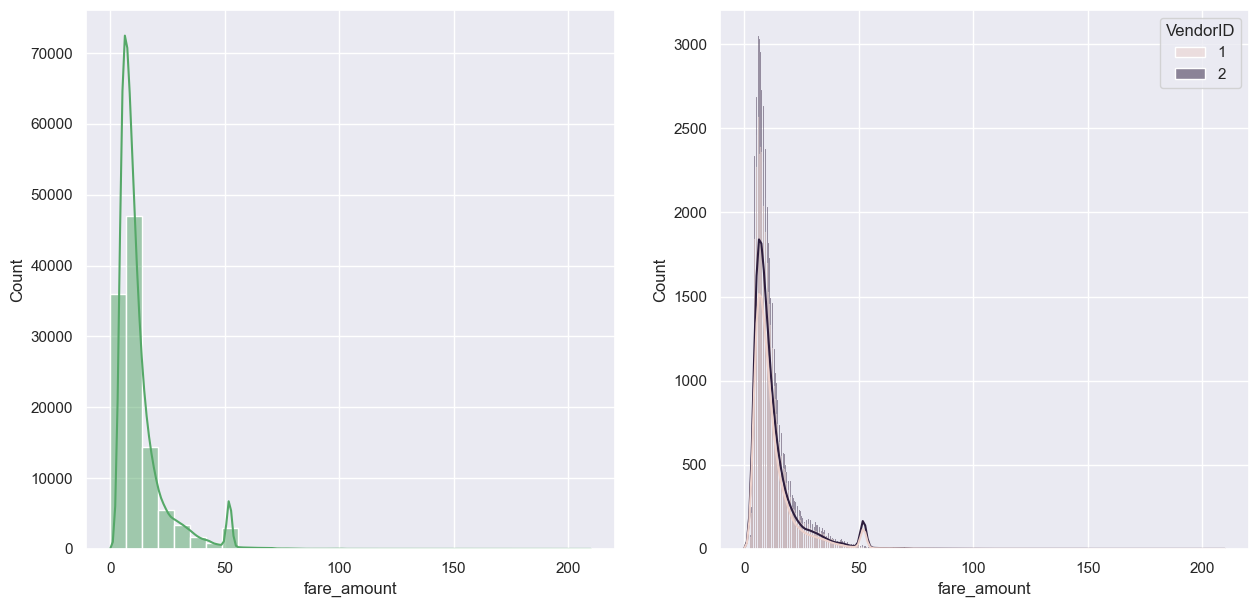

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='fare_amount',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='fare_amount',kde=True,hue='VendorID')
plt.show()

In [39]:
df['fare_amount'].mean(),df['fare_amount'].median()

(12.95855750556793, 9.5)

We can observe that the distribution is skewed with a mean of $12.96 and median of $9.5. 

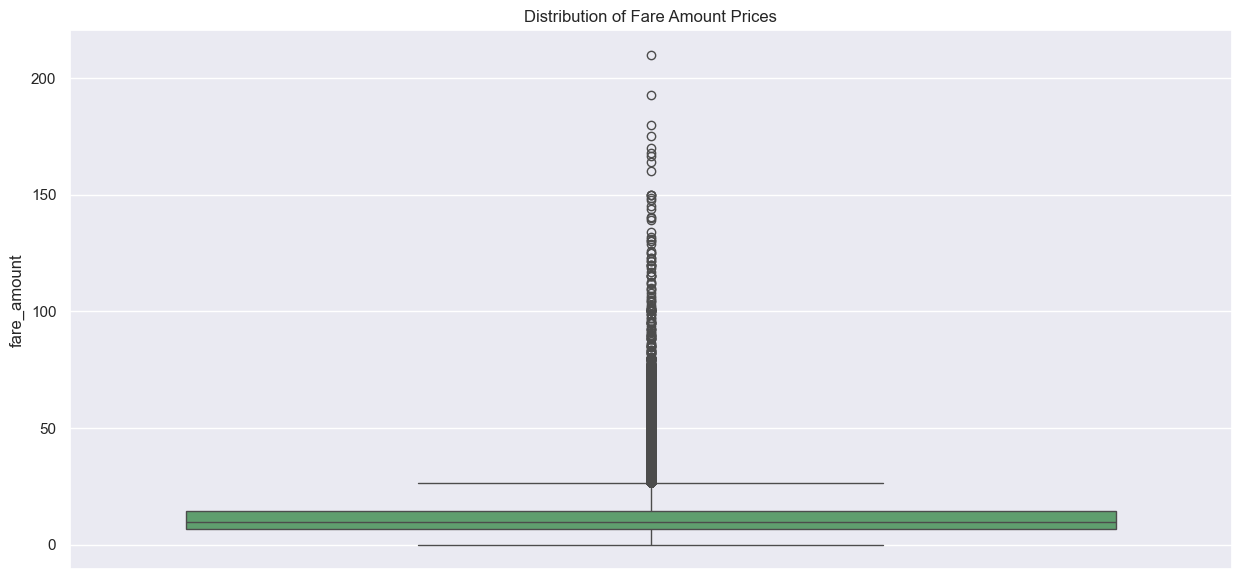

In [46]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
sns.boxplot(data=df,y='fare_amount',color='g')
plt.title("Distribution of Fare Amount Prices")
plt.show()

In [45]:
df['fare_amount'].sort_values(ascending=False)

102697    210.00
106040    192.50
30528     180.00
76125     175.00
33985     170.00
           ...  
67459       0.01
21361       0.01
54569       0.01
27012       0.01
89296       0.01
Name: fare_amount, Length: 112250, dtype: float64

### 4.1.2 VendorID

In [47]:
df['VendorID'].value_counts()

VendorID
2    61660
1    50590
Name: count, dtype: int64

In [49]:
df['VendorID'].value_counts(normalize=True)

VendorID
2    0.54931
1    0.45069
Name: proportion, dtype: float64

<Axes: xlabel='VendorID', ylabel='count'>

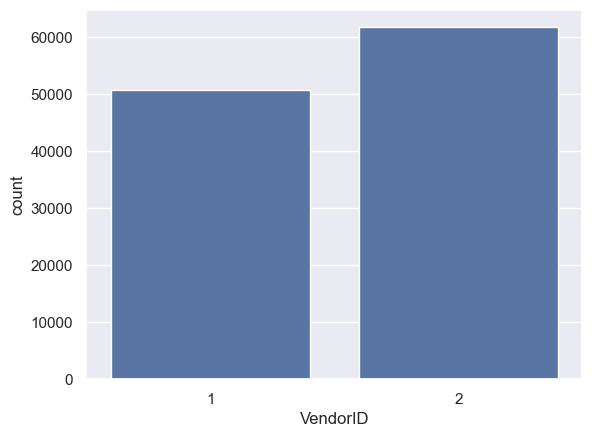

In [48]:
sns.countplot(x='VendorID',data=df)

From above we can observe Vendor2 has done sligtly more trips than vendor1: About 10% more trips

### 4.1.3 Passenger Count

In [51]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.712927
2    0.146227
5    0.048107
3    0.041942
6    0.029354
4    0.019964
0    0.001479
Name: proportion, dtype: float64

- About 71% of the trips had one passenger - We can observe majority of the trips ~ 85% had less than 3 passengers. 
- Seems there are trips with 0 passengers - This could be cases where the driver was dropping a parcel?

### 4.1.4 Trip Distance

In [52]:
#Getting the distribution of trip distance
df['trip_distance'].value_counts()

trip_distance
0.80     2612
0.90     2598
1.00     2496
0.70     2464
1.10     2448
         ... 
23.80       1
15.59       1
14.63       1
26.18       1
20.58       1
Name: count, Length: 2280, dtype: int64

In [53]:
df['trip_distance'].sort_values(ascending=False)

64580     54.69
89451     47.08
106040    46.25
7737      43.51
72960     42.98
          ...  
104840     0.01
43640      0.01
70117      0.01
94173      0.01
80889      0.01
Name: trip_distance, Length: 112250, dtype: float64

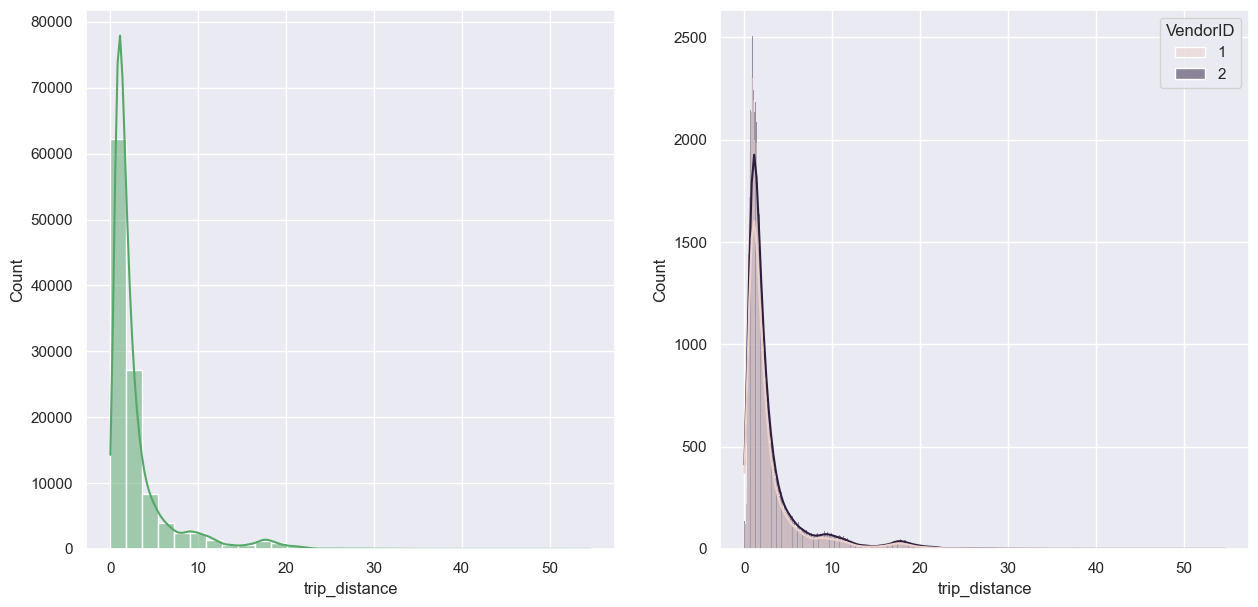

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='trip_distance',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='trip_distance',kde=True,hue='VendorID')
plt.show()

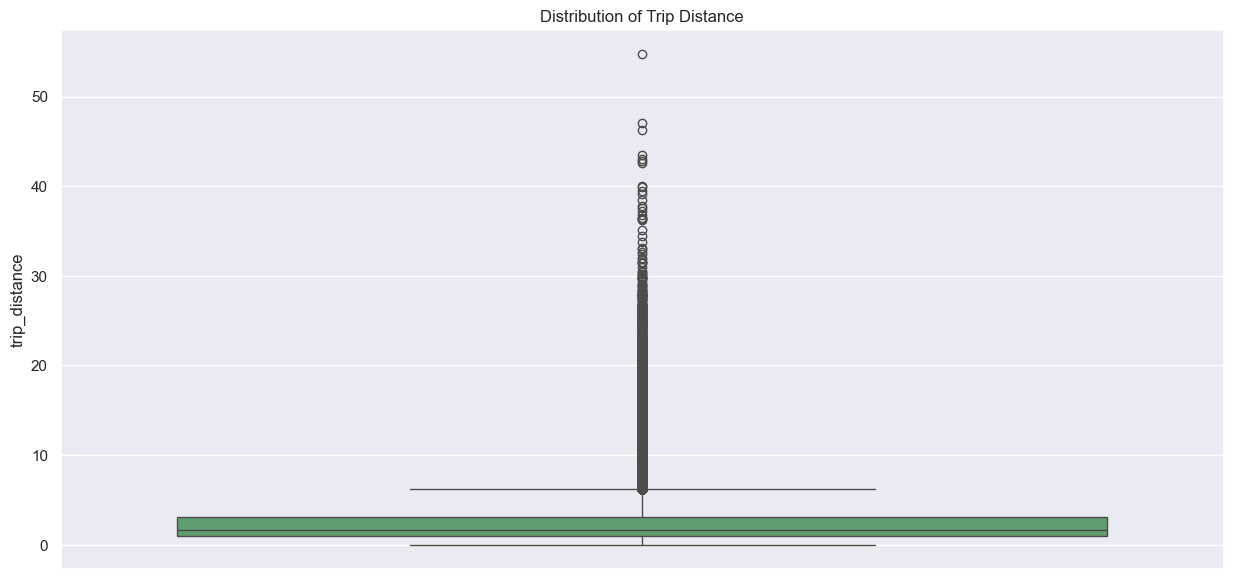

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
sns.boxplot(data=df,y='trip_distance',color='g')
plt.title("Distribution of Trip Distance")
plt.show()

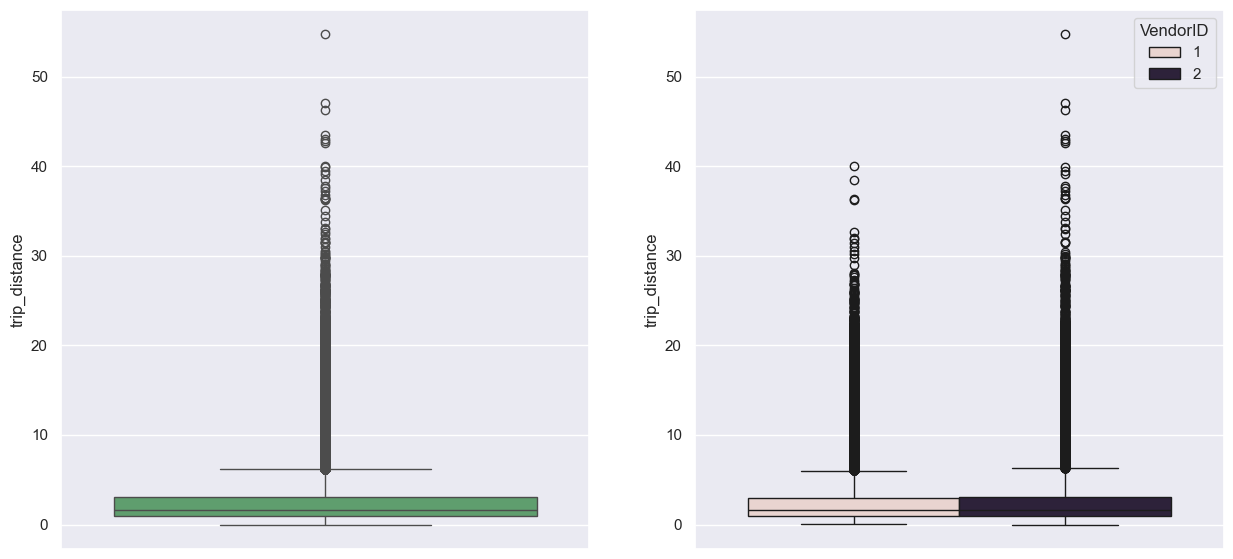

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.boxplot(data=df,y='trip_distance',color='g')
plt.subplot(122)
sns.boxplot(data=df,y='trip_distance',hue='VendorID')
plt.show()

In [56]:
df['trip_distance'].mean(),df['trip_distance'].median()

(2.959964899777283, 1.64)

- Seems majority of the trips are between 0.7 to 1.6 Miles
- The average distance is about 3 miles
- The maximum miles in the dataset: 54.69

### 4.1.5 Trips per Day of Week

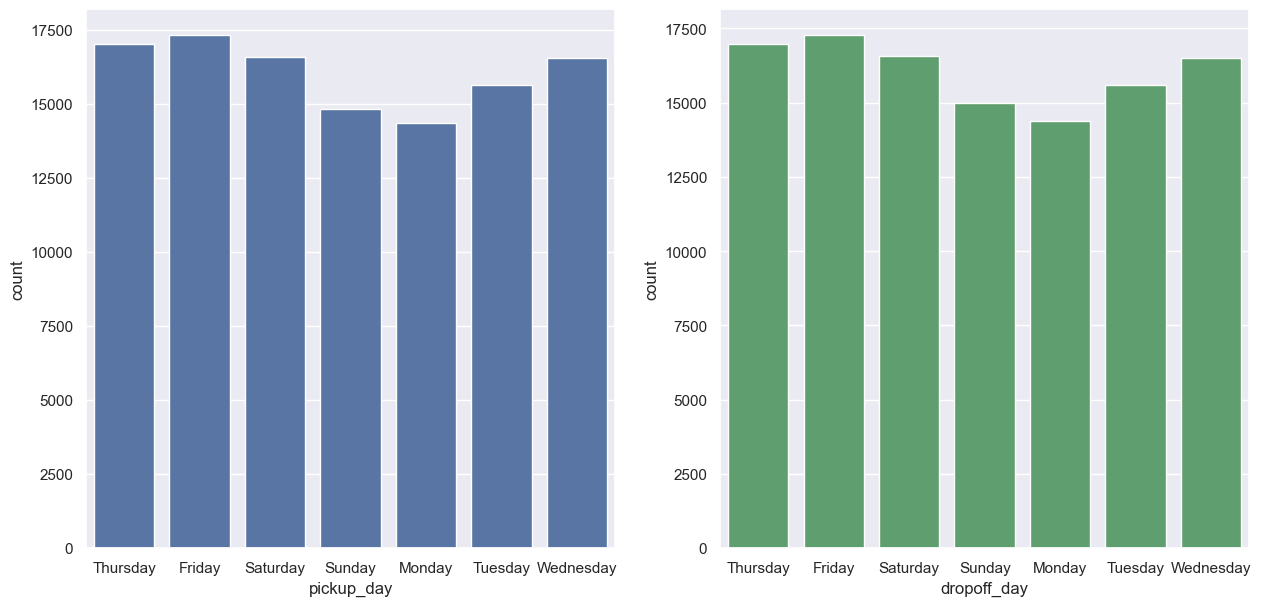

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
ax=sns.countplot(x="pickup_day",data=df,)
plt.subplot(122)
ax=sns.countplot(x="dropoff_day",data=df,color='g')
plt.show()

We observe that Friday is the busiest followed by Saturday probably because it's a weekend. Mondays have the least number of trips

### 4.1.6 Trips per Hour

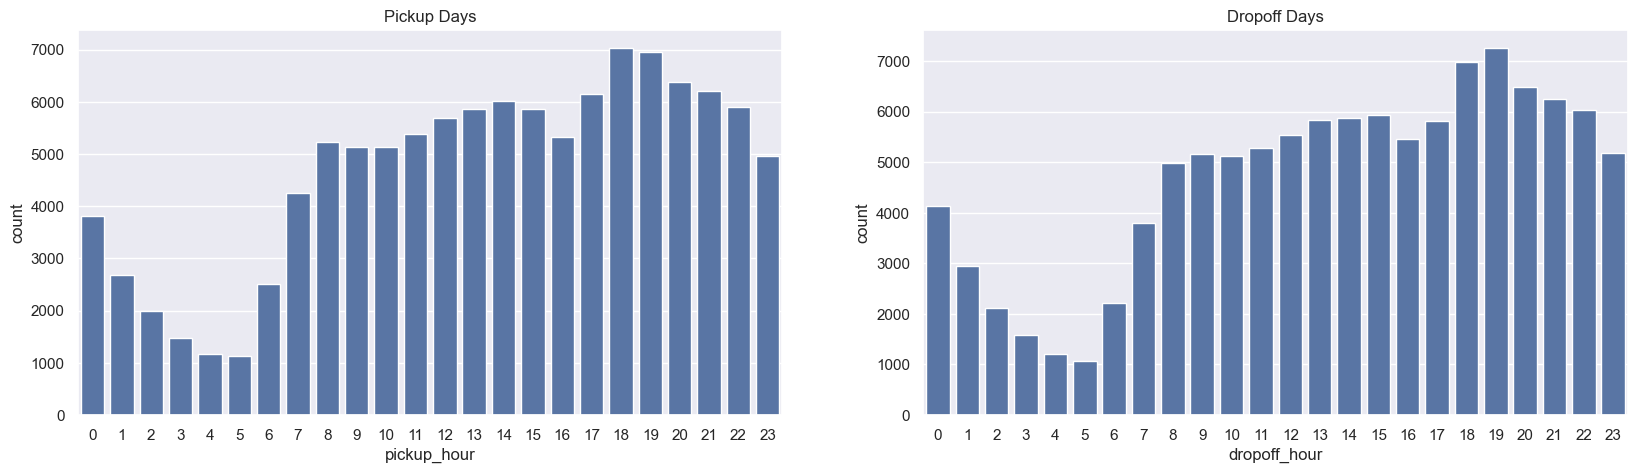

In [61]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

### 4.1.7 **Trips per Time of Day**

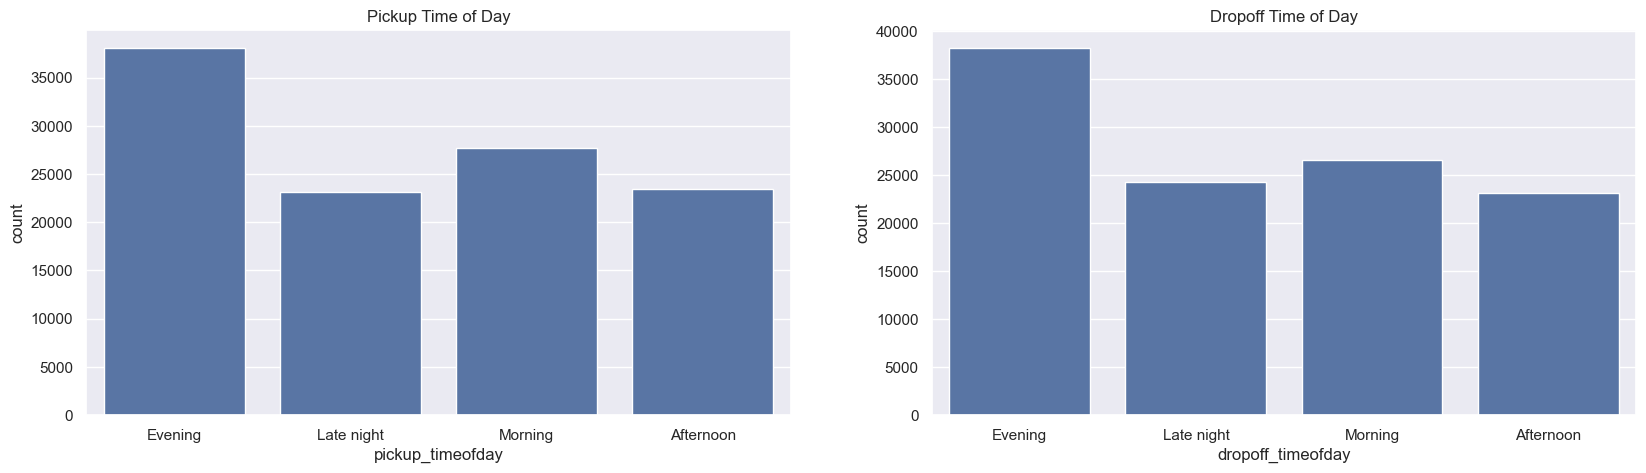

In [67]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

We observe that the busiest hours are between 6pm to 8pm. In the evenings

### 4.1.8 **Trips per Month**

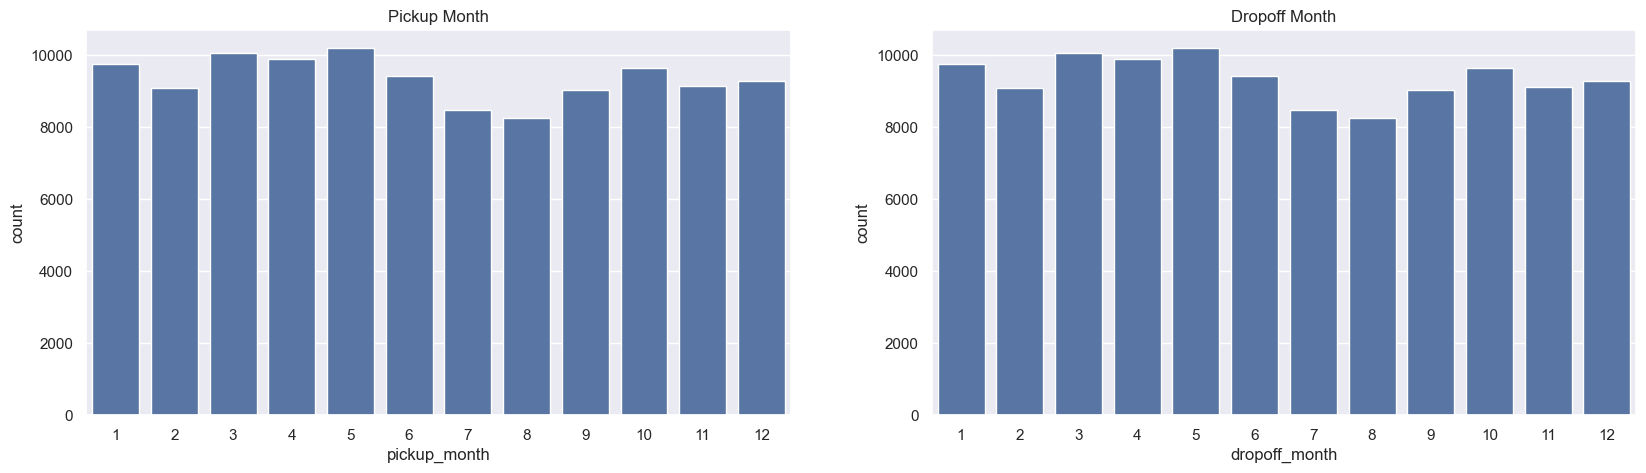

In [68]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

In [69]:
df['pickup_month'].value_counts()

pickup_month
5     10193
3     10069
4      9886
1      9766
10     9647
6      9417
12     9281
11     9132
2      9079
9      9042
7      8490
8      8248
Name: count, dtype: int64

There's generally not much difference in the number of trips accross the months. 

### 4.1.9 **Rate Code**

In [70]:
df['RatecodeID'].value_counts()

RatecodeID
1     109265
2       2530
3        224
5        158
4         72
99         1
Name: count, dtype: int64

We can observe a high number of the trips use Standard Rate

### 4.1.10 **Payment Type**

In [71]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.673390
2    0.321550
3    0.003688
4    0.001372
Name: proportion, dtype: float64

We can observe more than 99% of the trips are credit & cash based. 

### 4.1.11 **Pickup Location ID**

Understanding the distribution of the trips across the pickup locations

In [72]:
df['PULocationID'].value_counts()

PULocationID
237    4321
161    4250
186    3967
236    3928
230    3800
       ... 
165       1
155       1
131       1
220       1
81        1
Name: count, Length: 176, dtype: int64

In [73]:
df['DOLocationID'].value_counts()

DOLocationID
161    4340
236    4131
237    3925
170    3582
230    3497
       ... 
105       1
111       1
86        1
184       1
46        1
Name: count, Length: 251, dtype: int64

## 4.2 Bivariate Analysis

We'll try to understand the relationship between the independent variables and the target variable

### 4.2.1 **Fare Amount per Vendor**

<Axes: xlabel='VendorID', ylabel='fare_amount'>

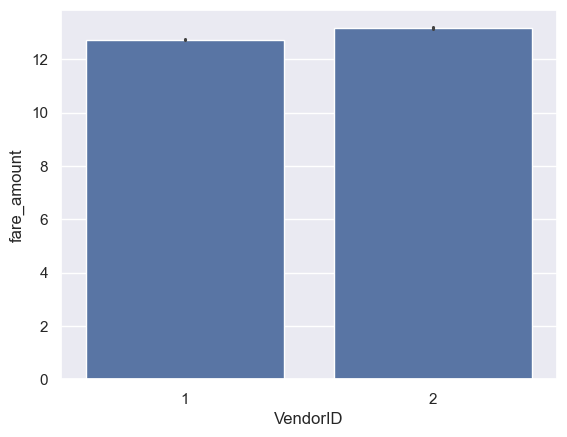

In [ ]:
sns.barplot(y='fare_amount',x='VendorID',data=df,estimator=np.mean)

Seems like there isn't much difference in fare amount between the two vendors.

### 4.2.2 **Fare Amount per Store and Forward Flag**

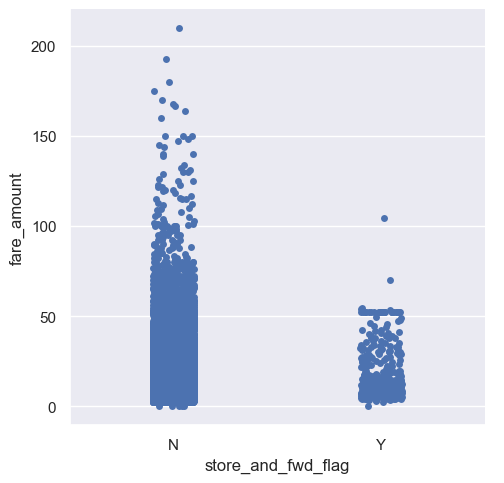

In [74]:
sns.set_theme(palette='deep')
sns.catplot(y='fare_amount',x='store_and_fwd_flag',data=df,kind='strip')

### 4.2.3 **Fare Amount per passenger count**

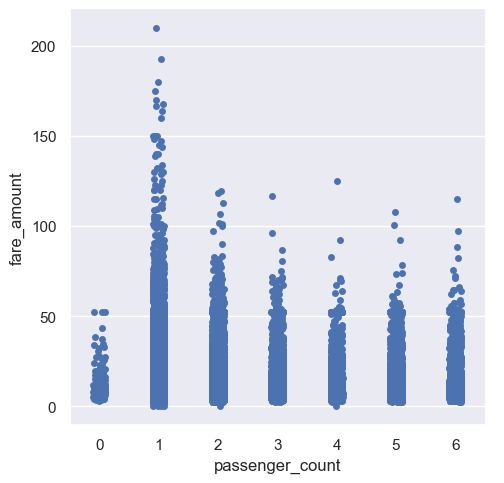

In [75]:
sns.catplot(y='fare_amount',x='passenger_count',data=df,kind='strip')

We can observe that there seems to be no visible relationship between fare amount and passenger count

### 4.2.4 **Fare Amount per Hour**

<Axes: xlabel='pickup_hour', ylabel='fare_amount'>

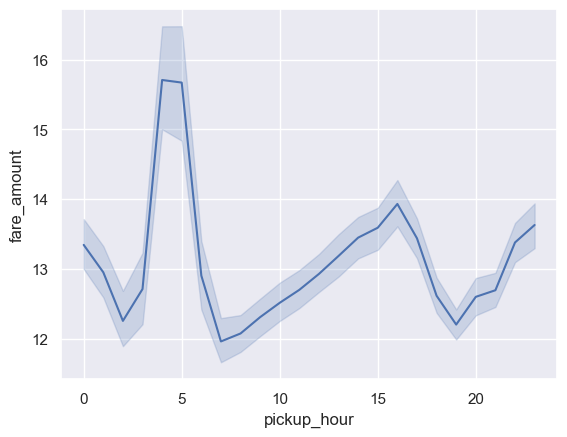

In [76]:
sns.lineplot(x='pickup_hour',y='fare_amount',data=df)

We can observe there is a relationship between fare amount and the pickup time,with early mornings having the highest rates and increases gradually to the afternoon.

### 4.2.5 **Fare Amount per Day of Week**

In [77]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday
0,2,2017-07-27 18:04:13,2017-07-27 18:42:53,1,10.80,1,N,143,138,1,36.0,38.666667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
1,2,2017-07-27 18:30:35,2017-07-27 18:52:03,6,6.53,1,N,231,162,1,21.0,21.466667,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
2,2,2017-07-27 18:01:39,2017-07-27 18:24:32,1,3.11,1,N,100,238,2,16.0,22.883333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
3,2,2017-07-27 18:31:48,2017-07-27 18:43:38,1,0.71,1,N,233,230,1,8.5,11.833333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening
4,2,2017-07-27 18:10:56,2017-07-27 18:19:01,1,1.35,1,N,186,249,1,7.5,8.083333,3,3,18,18,7,7,2017,2017,Thursday,Thursday,Evening,Evening


<Axes: xlabel='pickup_day', ylabel='fare_amount'>

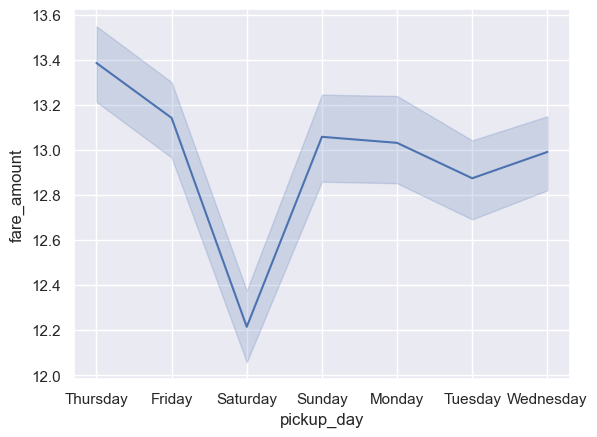

In [78]:
sns.lineplot(x='pickup_day',y='fare_amount',data=df)

We can observe the fare amount is lowest on Saturday's could be because of low demand

### 4.2.6 **Fare Amount per Month**

<Axes: xlabel='pickup_month', ylabel='fare_amount'>

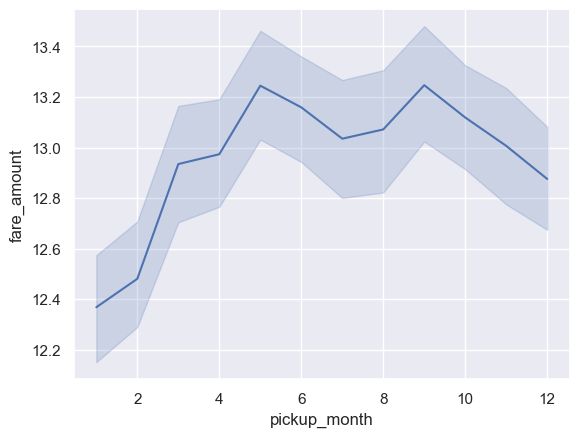

In [79]:
sns.lineplot(x='pickup_month',y='fare_amount',data=df)

We can observe the fare amount is highest between May and October

### 4.2.7 **Trip Duration & Distance**

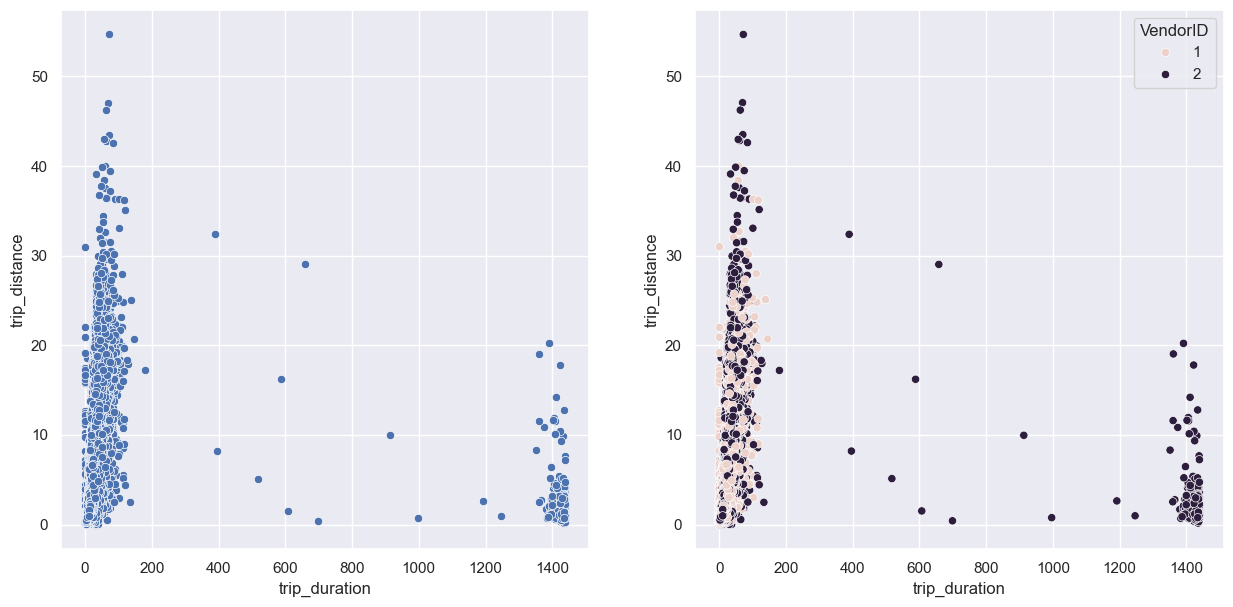

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(y='trip_distance',x='trip_duration',data=df)
plt.subplot(122)
sns.scatterplot(y='trip_distance',x='trip_duration',data=df,hue='VendorID')
plt.show()

- We can observe there are trips which have longer durations yet the distance is less, this could be due to traffic
- We can also observe that such trips are of Vendor2

### 4.2.8 **Trip Duration & Total Amount**

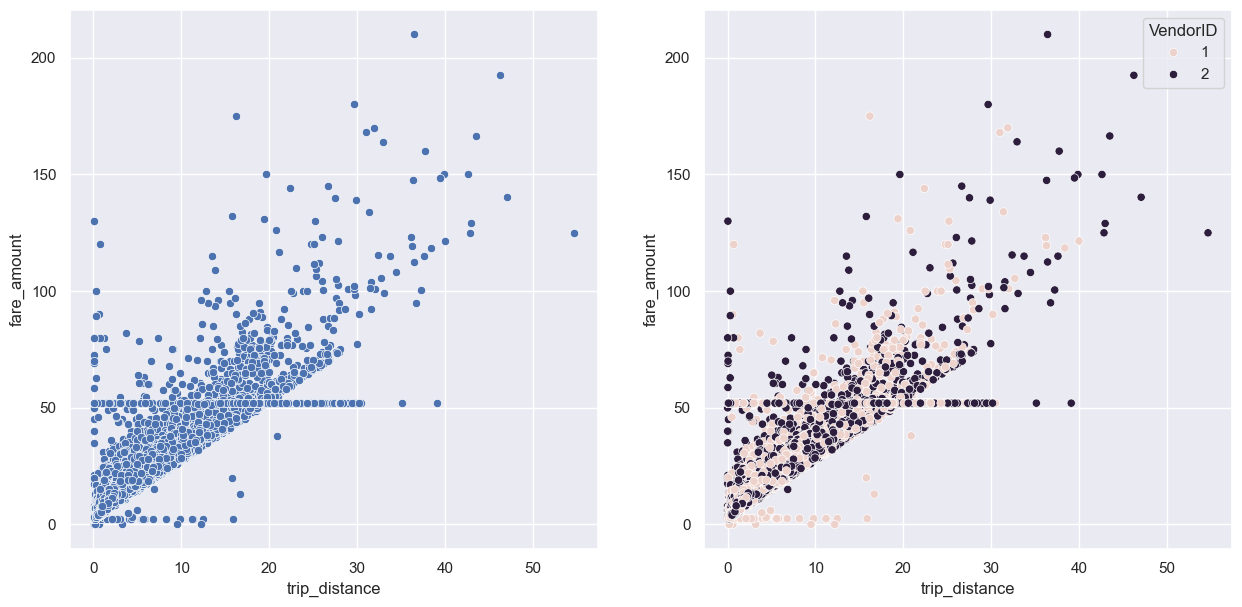

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(y='fare_amount',x='trip_distance',data=df)
plt.subplot(122)
sns.scatterplot(y='fare_amount',x='trip_distance',data=df,hue='VendorID')
plt.show()

- We can observe a linear relationship between the distance and fare amount
- It seems most of the trips that are outliers are for vendor2

### 4.2.9 **Checking Correlation**

In [84]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'trip_duration', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_year',
       'dropoff_year', 'pickup_day', 'dropoff_day', 'pickup_timeofday',
       'dropoff_timeofday'],
      dtype='object')

In [87]:
df = df[['VendorID','passenger_count', 'trip_distance', 'trip_duration','RatecodeID', 'store_and_fwd_flag','PULocationID', 'DOLocationID', 'payment_type',
       'pickup_day', 'dropoff_day',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday','fare_amount' ]]

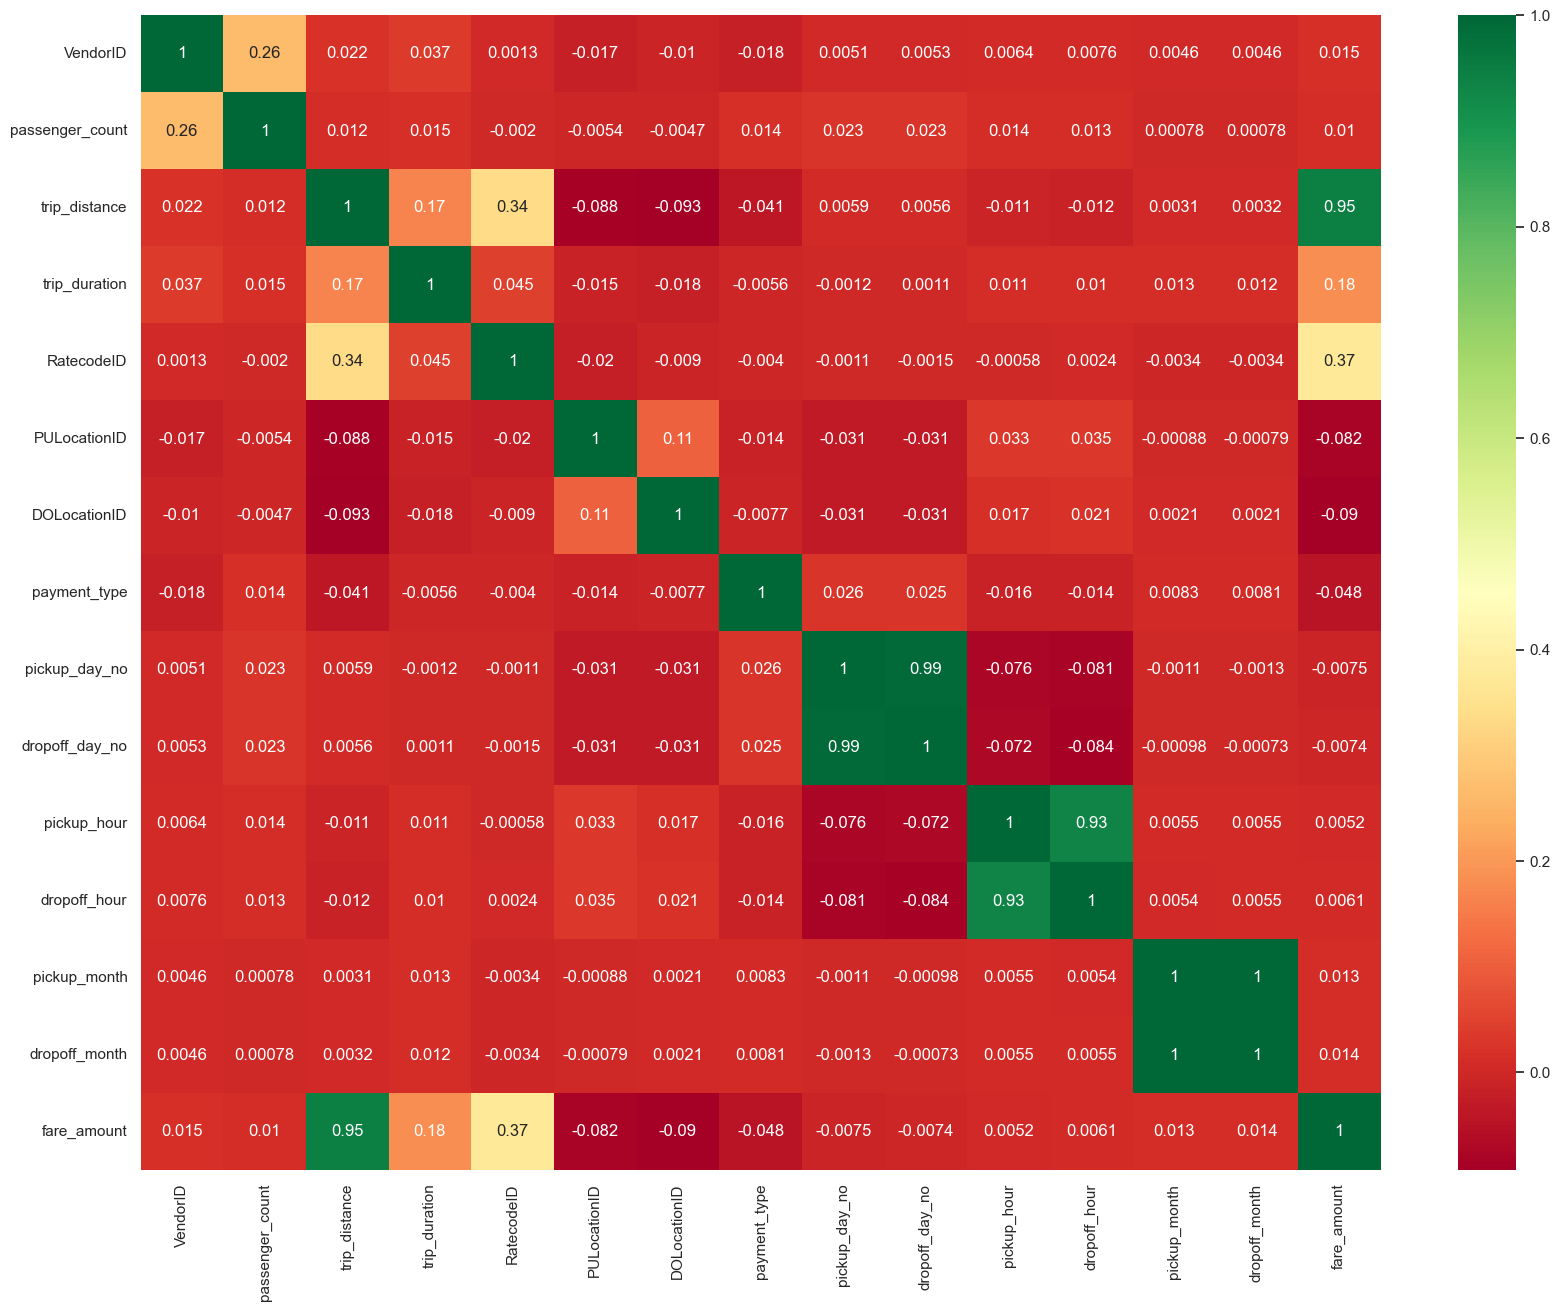

In [93]:
#getting correlation features in the dataset
corrmat = df.corr(numeric_only = True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
#plotting heatmap
g = sns.heatmap(df.corr(numeric_only = True),annot = True,cmap="RdYlGn")

From above, we can observe that trip distance and RateCodeID  and trip duration are the most likely predictors for fare amount

## Conclusion
- The Taxi fare amount is related with trip distance, trip duration and RateCodeID.
- Vendor2 takes trips that cover longer distances and/or longer trip duration.
- The fare amount is lowest on Saturday's
- The fare price is highest between May and November
- The fare prices are higher during early morning hours
- More than 99% of the trips are paid via Credit Card and Cash
- The busiest hours are between 6 to 8 PM
- The average trip distance is about 3 miles with a median of about 1.6 miles
- We can observe that the fare amount distribution is skewed with a mean of $12.96 and median of $9.5. 


### Data Preparation Steps:
- Loading the Raw Data
- Generate a sample of ~ 100,000 rows
- Feature Creation: [Trip Duration, Hour, Day of Week No, Month, Year]
- Drop Features: ['extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount','tpep_pickup_datetime', 'tpep_dropoff_datetime']
- Split data to train and test samples